In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [306]:
df = pd.read_csv(
    'data/rawdata/combined_data1.csv')

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1385 non-null   object
 1   Unnamed: 1   1357 non-null   object
 2   Unnamed: 2   1357 non-null   object
 3   Unnamed: 3   1337 non-null   object
 4   Unnamed: 4   1356 non-null   object
 5   Unnamed: 5   1375 non-null   object
 6   Unnamed: 6   1337 non-null   object
 7   Unnamed: 7   1374 non-null   object
 8   Unnamed: 8   1356 non-null   object
 9   Unnamed: 9   1375 non-null   object
 10  Unnamed: 10  969 non-null    object
 11  Unnamed: 11  20 non-null     object
 12  Unnamed: 12  20 non-null     object
 13  Unnamed: 13  20 non-null     object
 14  Unnamed: 14  20 non-null     object
 15  Unnamed: 15  20 non-null     object
 16  Unnamed: 16  18 non-null     object
 17  Unnamed: 17  18 non-null     object
dtypes: object(18)
memory usage: 197.4+ KB


In [308]:
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Personal => Stipan Aleksandar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Personal,Ereignistag,Fahrerzeit <font size=\'1\'>(im Monat)</font>,Pause <font size=\'1\'>(im Monat)</font>,gesetzl. Pause <font size=\'1\'>(im Monat)</font>,Insgesamt <font size=\'1\'>(im Monat)</font>,Std. Lohn,geleist. Bruttolohn <font size=\'1\'>(im Monat...,Sollzeit <font size=\'1\'>(im Monat)</font>,+- Diff. <font size=\'1\'>(im Monat)</font>,mtl. Bruttolohn <font size=\'1\'>(lt. Arbeitsv...,+- Guthaben Vormonat,geleist. Bruttolohn <font size=\'1\'>(im Monat...,Urlaub <br>5,Krank <br>0,Insgesamt Bruttolohn <font size=\'1\'>(im Mona...,Auszahlung Lohn,+- Rest-Guthaben
2,Stipan Aleksandar,01.2022,8480,474,566,7914,0,0,124.61,7.290000000000006,0,0,0,0,0,0,0,0
3,Personal,Ereignistag,Fahrer Zeit,Pause,gesetzl. Pause,Insgesamt,Std. Lohn,Lohn,Soll,+- Diff.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Stipan Aleksandar,2022-01-10 00:00:00,453,36,36,417,0,0,7.33,-0.3799999999999999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,Stipan Aleksandar,2021-12-29 00:00:00,202522,Hinfahrt,29.12.2021 07:28,07:30,25,29.12.2021 16:34,521,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,Stipan Aleksandar,2021-12-30 00:00:00,492,30,30,462,0,0,7.33,0.3700000000000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400,Personal,Ereignistag,Auftrag Nr.,Fahrtrichtung,Beginn Auftrag,Abholung/ Zustellung,Pause,Ende Auftrag,Auftragszeit Insgesamt,Std. Lohn,Lohn,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1401,Personal,Ereignistag,Auftrag Nr.,Fahrtrichtung,Beginn Auftrag,Abholung/ Zustellung,Pause,Ende Auftrag,Auftragszeit Insgesamt,Std. Lohn,Lohn,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
df.rename(columns={'Unnamed: 0': 'id', 'Unnamed: 1': 'date','Unnamed: 2': 'drive_time_min', 'Unnamed: 3': 'pause_had_min', 'Unnamed: 4': 'pause_should_min' }, inplace=True)

In [310]:
clean = df.loc[df['id'] == 'Stipan Aleksandar']

In [311]:
clean_columns = clean.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17'], axis=1)

In [312]:
clean_columns

,id,date,drive_time_min,pause_had_min,pause_should_min
2,Stipan Aleksandar,01.2022,8480,474,566
4,Stipan Aleksandar,2022-01-10 00:00:00,453,36,36
7,Stipan Aleksandar,2022-01-10 00:00:00,202833,Hinfahrt,10.01.2022 07:53
8,Stipan Aleksandar,2022-01-11 00:00:00,593,30,45
11,Stipan Aleksandar,2022-01-11 00:00:00,202834,Hinfahrt,11.01.2022 07:26
...,...,...,...,...,...
1394,Stipan Aleksandar,2021-12-28 00:00:00,202521,Hinfahrt,28.12.2021 07:29
1395,Stipan Aleksandar,2021-12-29 00:00:00,546,25,30
1398,Stipan Aleksandar,2021-12-29 00:00:00,202522,Hinfahrt,29.12.2021 07:28
1399,Stipan Aleksandar,2021-12-30 00:00:00,492,30,30


In [313]:
cleaned_rows.loc[:, 'date'] = pd.to_datetime(cleaned_rows['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
cleaned_rows = cleaned_rows.dropna(axis=0)
cleaned_rows = cleaned_rows.dropna(axis=1)
cleaned_rows = cleaned_rows.dropna(subset=['drive_time_min', 'pause_had_min', 'pause_should_min'])
cleaned_rows['drive_time_min'] = cleaned_rows['drive_time_min'].astype(int)
cleaned_rows['pause_had_min'] = cleaned_rows['pause_had_min'].astype(int)
cleaned_rows['pause_should_min'] = cleaned_rows['pause_should_min'].astype(int)

In [314]:
cleaned_rows

,id,date,drive_time_min,pause_had_min,pause_should_min
4,Stipan Aleksandar,2022-01-10,453,36,36
8,Stipan Aleksandar,2022-01-11,593,30,45
12,Stipan Aleksandar,2022-01-12,508,26,30
16,Stipan Aleksandar,2022-01-13,457,29,30
20,Stipan Aleksandar,2022-01-14,487,28,30
...,...,...,...,...,...
1371,Stipan Aleksandar,2021-12-21,588,25,45
1375,Stipan Aleksandar,2021-12-22,474,23,30
1379,Stipan Aleksandar,2021-12-23,515,44,44
1395,Stipan Aleksandar,2021-12-29,546,25,30


In [315]:
cleaned_rows['date'] = pd.to_datetime(cleaned_rows['date'], format='%Y-%m-%d')
cleaned_data = cleaned_rows

In [316]:
cleaned_data

,id,date,drive_time_min,pause_had_min,pause_should_min
4,Stipan Aleksandar,2022-01-10,453,36,36
8,Stipan Aleksandar,2022-01-11,593,30,45
12,Stipan Aleksandar,2022-01-12,508,26,30
16,Stipan Aleksandar,2022-01-13,457,29,30
20,Stipan Aleksandar,2022-01-14,487,28,30
...,...,...,...,...,...
1371,Stipan Aleksandar,2021-12-21,588,25,45
1375,Stipan Aleksandar,2021-12-22,474,23,30
1379,Stipan Aleksandar,2021-12-23,515,44,44
1395,Stipan Aleksandar,2021-12-29,546,25,30


In [321]:
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%Y-%m-%d')

In [322]:
cleaned_data['total_time_hour'] = (cleaned_data['drive_time_min'] + cleaned_data['pause_should_min']) / 60

In [323]:
cleaned_data.describe()

,date,drive_time_min,pause_had_min,pause_should_min,total_time_hour
count,306,306.000000,306.000000,306.000000,306.000000
mean,2021-12-11 13:05:52.941176576,500.650327,26.300654,32.130719,8.879684
min,2021-05-01 00:00:00,298.000000,0.000000,0.000000,4.966667
25%,2021-08-12 06:00:00,470.000000,26.000000,30.000000,8.333333
50%,2021-12-01 12:00:00,488.000000,29.000000,30.000000,8.666667
75%,2022-03-29 18:00:00,531.000000,30.000000,31.000000,9.350000
max,2022-08-31 00:00:00,705.000000,49.000000,49.000000,12.500000
std,NaN,51.288435,9.659165,6.351138,0.936350


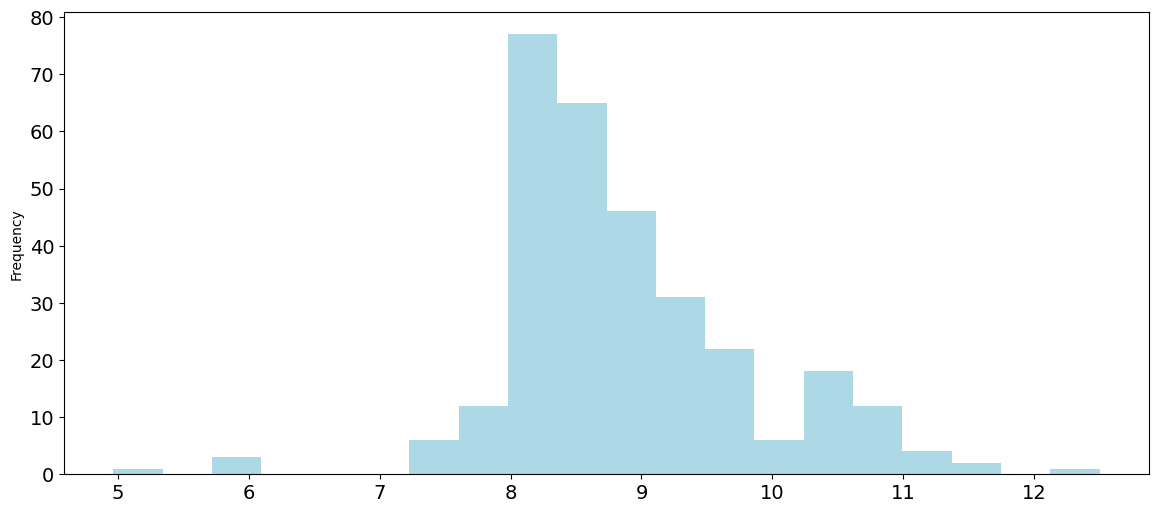

In [330]:
x = cleaned_data['total_time_hour'].plot(kind='hist', figsize=(14, 6), bins=20, fontsize=14, color='lightblue')


<Axes: xlabel='date'>

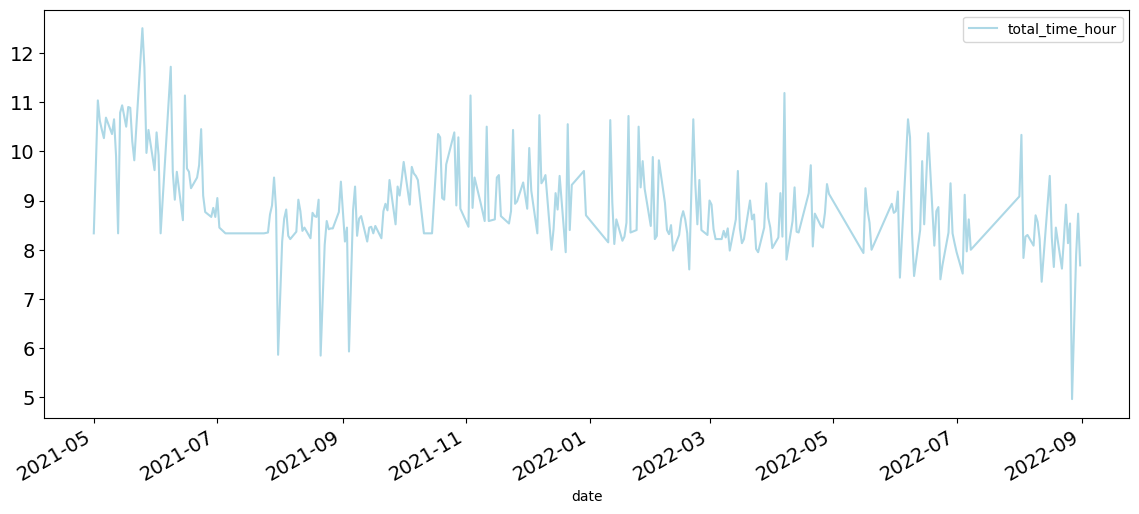

In [332]:
cleaned_data.plot(x='date', y='total_time_hour', figsize=(14, 6), fontsize=14, color='lightblue')

In [333]:
cleaned_data.to_csv('cleaned_data1.csv', index=False)
